In [35]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier,Pool
from sklearn.metrics import classification_report, roc_curve, auc,confusion_matrix
import xgboost as xgb

In [2]:
data= pd.read_excel('PCOS_data_.xlsx', sheet_name= 'Full_new')
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


## DATA PREPROCESSING

In [3]:
#Dropping unwanted columns
data=data.drop(['Unnamed: 44','Sl. No','Patient File No.'],axis=1)

In [4]:
#checking dimensions of the data
data.shape

(541, 42)

In [5]:
#Checking for null values
data.isna().sum()

PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(Y/N)              0
Pimples(Y/N)                0
Fast food 

In [6]:
#dropping null values
data.drop(['FSH/LH','Waist:Hip Ratio'],axis=1,inplace=True)

In [7]:
data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)',
       'Waist(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [8]:
#replacing the missing BMI value
data['BMI'] = data['BMI'].fillna(data['Weight (Kg)']/(data['Height(Cm) ']/100)**2)

In [9]:
data['BMI']=data['BMI'].round(1)

In [10]:
data.dtypes

PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
Hip(inch)                   int64
Waist(inch)                 int64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/N)            int64
Skin darkening (Y/N)        int64
Hair loss(Y/N)

### Some of the features which must be float belong to obejct datatype here, it must be converted to float

In [11]:
#Defining a function to convert to float
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None 

In [12]:
#applying the above function on features that require conversion to float
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].apply(convert_to_float)
data['AMH(ng/mL)']=data['AMH(ng/mL)'].apply(convert_to_float)

In [13]:
#Checking for null values again, after converting object to float. dropping if any are present
data.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)    

In [14]:
data.dropna(inplace=True)

In [15]:
# Clearing up the extra space in the column names.
data.columns = [col.strip() for col in data.columns]
data.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)',
       'Waist(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

## EDA

### Countplot

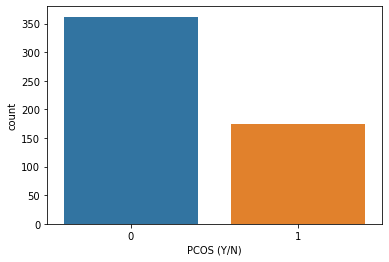

In [16]:
sns.countplot(x ='PCOS (Y/N)', data = data)

### This dataset is heavily imbalanced , hence this must be kept in mind while choosing the model

### Heat map to analyse the correlation between predictors and target variable

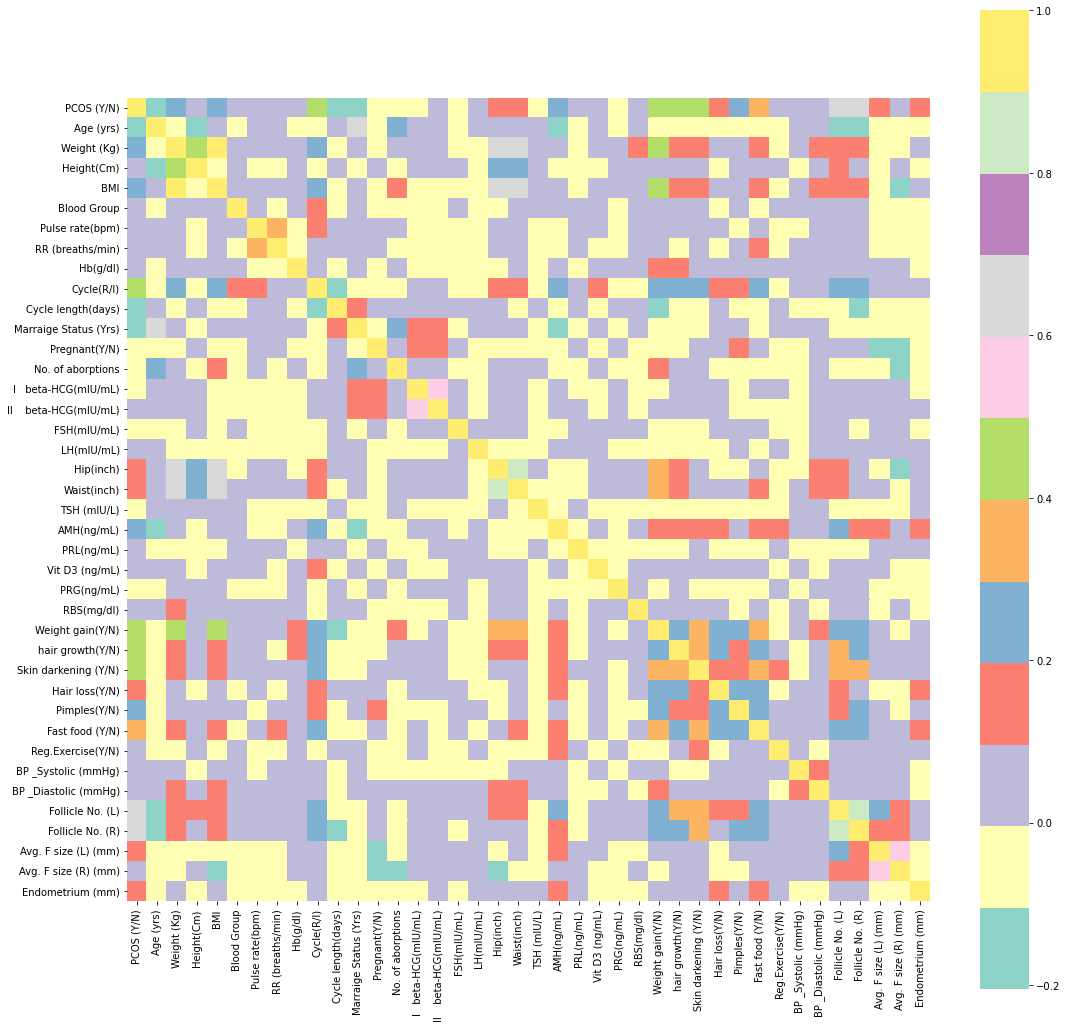

In [17]:
import matplotlib.pyplot as plt
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True)

In [18]:
#correlation according to to above heat map in ascending order
feature_imp=corrmat['PCOS (Y/N)'].sort_values(ascending=False)
feature_imp

PCOS (Y/N)                1.000000
Follicle No. (R)          0.649591
Follicle No. (L)          0.600376
Skin darkening (Y/N)      0.479234
hair growth(Y/N)          0.464201
Weight gain(Y/N)          0.441193
Cycle(R/I)                0.404407
Fast food (Y/N)           0.379460
Pimples(Y/N)              0.293782
AMH(ng/mL)                0.259442
Weight (Kg)               0.215770
BMI                       0.204064
Hair loss(Y/N)            0.174093
Waist(inch)               0.159339
Hip(inch)                 0.156394
Avg. F size (L) (mm)      0.128089
Endometrium (mm)          0.103203
Avg. F size (R) (mm)      0.093478
Pulse rate(bpm)           0.092428
Hb(g/dl)                  0.089103
Vit D3 (ng/mL)            0.086195
Height(Cm)                0.068536
Reg.Exercise(Y/N)         0.067619
LH(mIU/mL)                0.064239
RBS(mg/dl)                0.050688
RR (breaths/min)          0.040696
BP _Diastolic (mmHg)      0.037020
Blood Group               0.032041
BP _Systolic (mmHg) 

In [19]:
#creating a dataframe that contains the correlation of each predictor w.r.t the target
feature_imp = feature_imp.reset_index()
feature_imp.columns = ['Feature', 'Importance']
feature_imp.drop(0, inplace=True)
feature_imp

,Feature,Importance
1,Follicle No. (R),0.649591
2,Follicle No. (L),0.600376
3,Skin darkening (Y/N),0.479234
4,hair growth(Y/N),0.464201
5,Weight gain(Y/N),0.441193
6,Cycle(R/I),0.404407
7,Fast food (Y/N),0.379460
8,Pimples(Y/N),0.293782
9,AMH(ng/mL),0.259442
10,Weight (Kg),0.215770


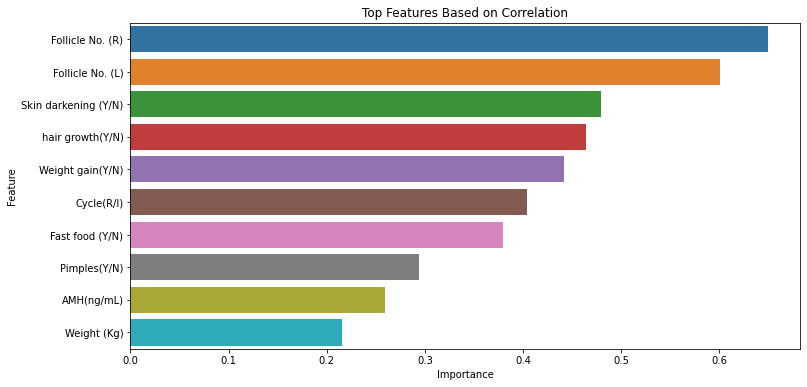

In [20]:
#visualizing the importance of top 10 features
top_features = feature_imp.head(10)
#Bar plot of feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top Features Based on Correlation')
plt.show()

### Since this dataset has too many features and a huge number of features tend to reduce the model performance, only the top 10 most correlated features are selected for modelling.

## MODELLING

In [21]:
#Splitting data into train and test sets
X=data[['Follicle No. (R)','Follicle No. (L)','Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Fast food (Y/N)',
        'Pimples(Y/N)','AMH(ng/mL)','Weight (Kg)' ]]
y=data['PCOS (Y/N)']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=32)

## Random forest classifier


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(class_weight='balanced',random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

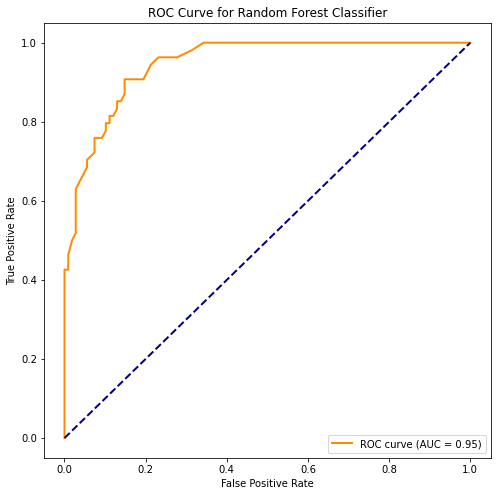

In [23]:
from sklearn.metrics import roc_curve, auc
y_scores = rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

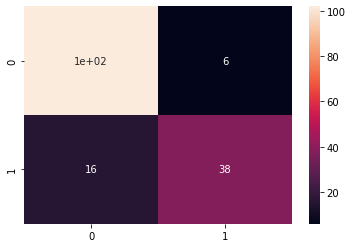

In [25]:
y_pred=rfc.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       108
           1       0.86      0.70      0.78        54

    accuracy                           0.86       162
   macro avg       0.86      0.82      0.84       162
weighted avg       0.86      0.86      0.86       162



### SVM 

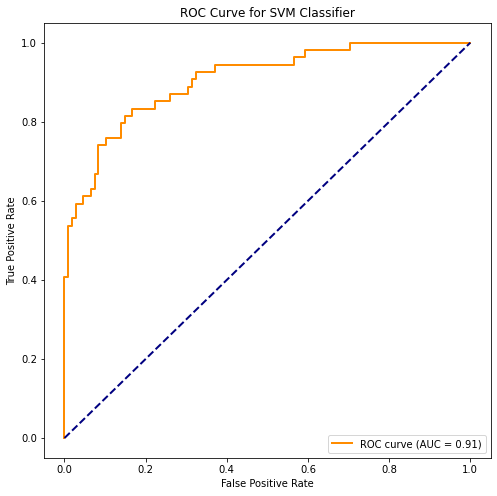

In [28]:
svm_classifier = SVC(class_weight='balanced', probability=True,random_state=80)
svm_classifier.fit(X_train, y_train)
y_scores = svm_classifier.predict_proba(X_test)[:, 1]
y_pred=svm_classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

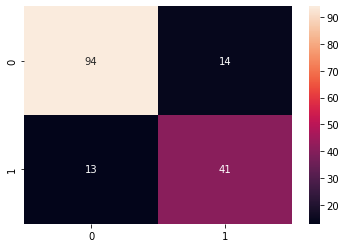

In [29]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       108
           1       0.75      0.76      0.75        54

    accuracy                           0.83       162
   macro avg       0.81      0.81      0.81       162
weighted avg       0.83      0.83      0.83       162



### Catboost classifier 

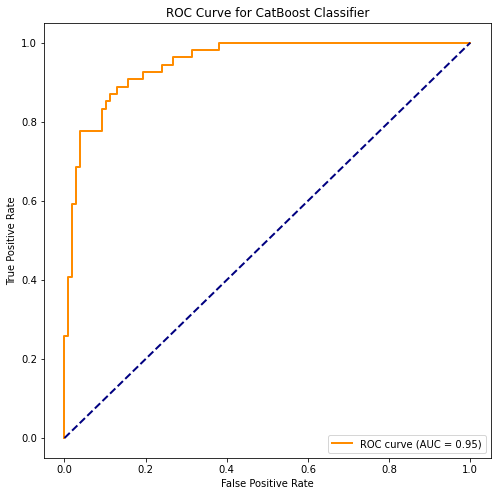

In [32]:
train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)
from sklearn.metrics import roc_auc_score
# Training CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, class_weights=[1, 19], verbose=0,random_state=90)
catboost_classifier.fit(train_pool)
y_scores = catboost_classifier.predict_proba(X_test)[:, 1]
y_pred = catboost_classifier.predict(X_test)

# Calculating ROC-AUC
roc_auc = roc_auc_score(y_test, y_scores)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Classifier')
plt.legend(loc='lower right')
plt.show()

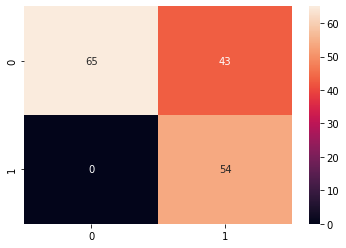

In [33]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       108
           1       0.56      1.00      0.72        54

    accuracy                           0.73       162
   macro avg       0.78      0.80      0.73       162
weighted avg       0.85      0.73      0.74       162



### XGBoost Classifier 

In [39]:
y.value_counts()

0    362
1    175
Name: PCOS (Y/N), dtype: int64

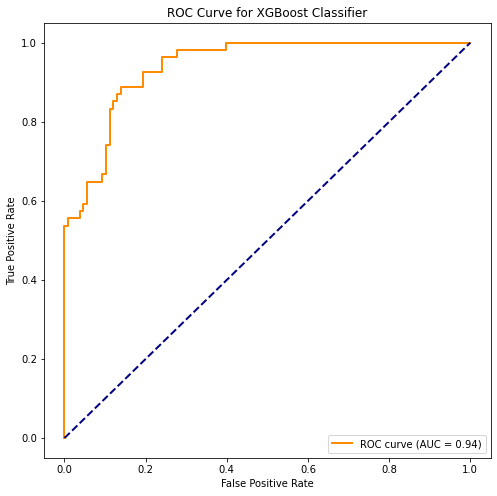

In [40]:
#Creating an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=362/175, random_state=42)
xgb_classifier.fit(X_train, y_train)

#Getting predicted probabilities for the positive class
y_scores = xgb_classifier.predict_proba(X_test)[:, 1]
y_pred=xgb_classifier.predict(X_test)
#Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

#Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()

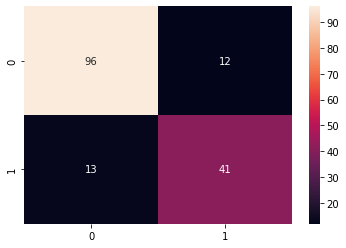

In [41]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       108
           1       0.77      0.76      0.77        54

    accuracy                           0.85       162
   macro avg       0.83      0.82      0.83       162
weighted avg       0.85      0.85      0.85       162



### Upon comparing all the above models based on their ROC-AUC,Confusion matrix and classification report, Random forest is the recommended model for this dataset.